In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(df["sex"].value_counts())
print(df["region"].value_counts())
print(df["smoker"].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


Data Pre-processing

In [6]:
x = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

In [7]:
x

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()
le2= LabelEncoder()
x[:,1]= le1.fit_transform(x[:,1])
x[:,4]= le2.fit_transform(x[:,4])

In [9]:
x

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
x = ct.fit_transform(x)

In [11]:
x[0]

array([0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1], dtype=object)

In [12]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x[:,(4,6)]=sc1.fit_transform(x[:,(4,6)])

In [13]:
x[0]

array([0.0, 0.0, 0.0, 1.0, -1.4387642602644821, 0, -0.45332000146019785,
       0, 1], dtype=object)

Dividing the Data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Applying Model

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Analysing the Accuracy of model

In [16]:
y_pred = lr.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
print("R2 score: ", r2_score(y_test,y_pred))

R2 score:  0.7449000862467451


In [19]:
from yellowbrick.regressor import ResidualsPlot,PredictionError

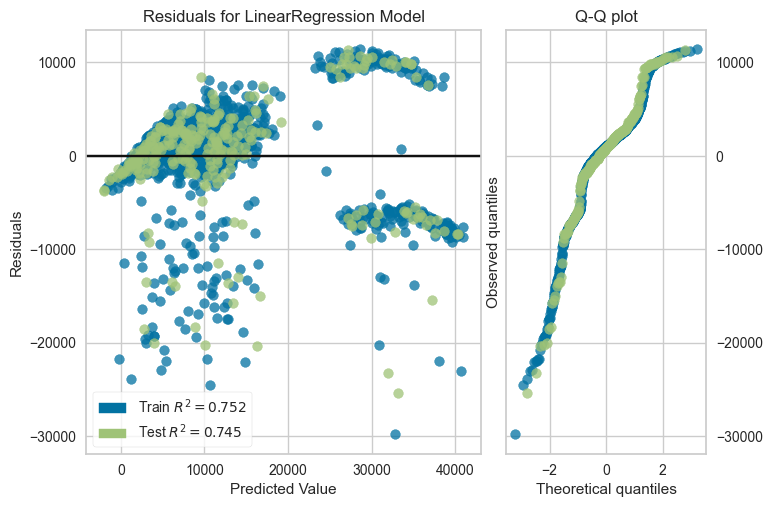

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
visualizer = ResidualsPlot(lr,hist=False, qqplot=True)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()

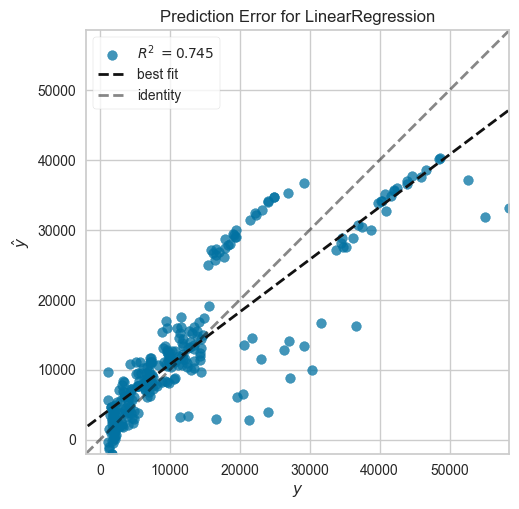

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
visualizer = PredictionError(lr)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()